# Project 3

Jennifer Cheng  
DATA71200: Summer 2021  
June 28, 2021  

-----

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mglearn
import seaborn as sns # for dataset

## Step 1: Load your data, including testing/training split from Project 1

In [14]:
penguins_raw = sns.load_dataset("penguins") 
penguins_raw.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


### Your testing and training split should be balanced

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
# drop target variable and variable not being used (categorical)
X = penguins_raw.drop(["species"], axis=1)

# target variable
y = penguins_raw["species"]

# split data and labels into a training and a test set without stratifying
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0) 

In [17]:
# Training data (75%) dimensions 
print("X_train shape (rows, columns):", X_train.shape)
print("y_train shape:", y_train.shape)
# Testing data (25%) dimensions 
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape (rows, columns): (258, 6)
y_train shape: (258,)
X_test shape: (86, 6)
y_test shape: (86,)


In [18]:
# Are testing and training sets are balanced in terms of target classes?
y_train.value_counts(normalize=True) * 100

Adelie       44.186047
Gentoo       36.046512
Chinstrap    19.767442
Name: species, dtype: float64

In [19]:
y_test.value_counts(normalize=True) * 100

Adelie       44.186047
Gentoo       36.046512
Chinstrap    19.767442
Name: species, dtype: float64

### Your data should be clean and missing data should be addressed

**Missing data: training set**

In [20]:
# training features: number of missing values per variable
X_train.isnull().sum()

island               0
bill_length_mm       1
bill_depth_mm        1
flipper_length_mm    1
body_mass_g          1
sex                  8
dtype: int64

Results: Features training set has missing values. What are they?

In [21]:
# show rows with missing data
X_train_null = pd.DataFrame(X_train, columns = X.columns)
X_train_null = X_train_null[X_train_null.isnull().any(axis=1)]
X_train_null

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
286,Biscoe,46.2,14.4,214.0,4650.0,NaN
11,Torgersen,37.8,17.3,180.0,3700.0,NaN
324,Biscoe,47.3,13.8,216.0,4725.0,NaN
3,Torgersen,NaN,NaN,NaN,NaN,NaN
8,Torgersen,34.1,18.1,193.0,3475.0,NaN
10,Torgersen,37.8,17.1,186.0,3300.0,NaN
336,Biscoe,44.5,15.7,217.0,4875.0,NaN
246,Biscoe,44.5,14.3,216.0,4100.0,NaN


Result: Only a Torgersen penguin (row 3) is missing numeric data so just remove that row.

In [22]:
# drop row with missing values
X_train_final = X_train.dropna(subset=["bill_length_mm"], axis=0)

# replay
X_train_null = pd.DataFrame(X_train_final, columns = X.columns)
X_train_null = X_train_null[X_train_null.isnull().any(axis=1)]
X_train_null

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
286,Biscoe,46.2,14.4,214.0,4650.0,NaN
11,Torgersen,37.8,17.3,180.0,3700.0,NaN
324,Biscoe,47.3,13.8,216.0,4725.0,NaN
8,Torgersen,34.1,18.1,193.0,3475.0,NaN
10,Torgersen,37.8,17.1,186.0,3300.0,NaN
336,Biscoe,44.5,15.7,217.0,4875.0,NaN
246,Biscoe,44.5,14.3,216.0,4100.0,NaN


Result: Now only the categorical variable of `sex` has missing values. Fill in missing values using most frequent class/label ([source](https://jamesrledoux.com/code/imputation)).

In [23]:
X_train_final = X_train_final.apply(lambda X_train_final: X_train_final.fillna(X_train_final.value_counts().index[0]))
X_train_final.head()

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
286,Biscoe,46.2,14.4,214.0,4650.0,Female
110,Biscoe,38.1,16.5,198.0,3825.0,Female
63,Biscoe,41.1,18.2,192.0,4050.0,Male
91,Dream,41.1,18.1,205.0,4300.0,Male
329,Biscoe,48.1,15.1,209.0,5500.0,Male


In [24]:
# final check of missing training features data
X_train_final.isnull().sum()

island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [25]:
print("No. of missing values for target training set (species):", y_train.isnull().sum())

No. of missing values for target training set (species): 0


In [26]:
# remove row 3 (row that was deleted from training features set)
y_train_final = y_train.drop([3])
y_train_final.shape

(257,)

**Missing data: test set**

In [27]:
# training features: number of missing values per variable
X_test.isnull().sum()

island               0
bill_length_mm       1
bill_depth_mm        1
flipper_length_mm    1
body_mass_g          1
sex                  3
dtype: int64

In [28]:
print("No. of missing values for target test set (species):", y_test.isnull().sum())

No. of missing values for target test set (species): 0


In [29]:
# show rows with missing data in test set
X_test_null = pd.DataFrame(X_test, columns = X.columns)
X_test_null = X_test_null[X_test_null.isnull().any(axis=1)]
X_test_null

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
9,Torgersen,42.0,20.2,190.0,4250.0,NaN
47,Dream,37.5,18.9,179.0,2975.0,NaN
339,Biscoe,NaN,NaN,NaN,NaN,NaN


In [30]:
# drop row 339 with missing values across
X_test_final = X_test.dropna(subset=["bill_length_mm"], axis=0)

# replay
X_test_null = pd.DataFrame(X_test_final, columns = X.columns)
X_test_null = X_test_null[X_test_null.isnull().any(axis=1)]
X_test_null

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
9,Torgersen,42.0,20.2,190.0,4250.0,NaN
47,Dream,37.5,18.9,179.0,2975.0,NaN


In [31]:
# fill in missing sex values with more frequent class
X_test_final = X_test_final.apply(lambda X_test_final: X_test_final.fillna(X_test_final.value_counts().index[0]))
X_test_final.head()

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
174,Dream,43.2,16.6,187.0,2900.0,Female
225,Biscoe,46.5,13.5,210.0,4550.0,Female
137,Dream,40.2,20.1,200.0,3975.0,Male
223,Biscoe,50.0,15.2,218.0,5700.0,Male
117,Torgersen,37.3,20.5,199.0,3775.0,Male


In [32]:
# final check of missing testing features data
X_test_final.isnull().sum()

island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [33]:
# remove row 339 (row that was deleted from test features set)
y_test_final = y_test.drop([339])
y_test_final.shape

(85,)

## All appropriate variables are converted to categorical variables (as ordinal or one hot)

### Encoding categorial variables: training set

In [34]:
# Apply one-hot encoding to sex (and island) feature
X_train_enc = pd.get_dummies(X_train_final)
X_train_enc.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island_Biscoe,island_Dream,island_Torgersen,sex_Female,sex_Male
286,46.2,14.4,214.0,4650.0,1,0,0,1,0
110,38.1,16.5,198.0,3825.0,1,0,0,1,0
63,41.1,18.2,192.0,4050.0,1,0,0,0,1
91,41.1,18.1,205.0,4300.0,0,1,0,0,1
329,48.1,15.1,209.0,5500.0,1,0,0,0,1


In [36]:
# for target feature (species)
y_train_enc = pd.get_dummies(y_train_final)
y_train_enc.head()

,Adelie,Chinstrap,Gentoo
286,0,0,1
110,1,0,0
63,1,0,0
91,1,0,0
329,0,0,1


### Encoding categorical variables: testing set

In [37]:
X_test_enc = pd.get_dummies(X_test_final)
X_test_enc.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island_Biscoe,island_Dream,island_Torgersen,sex_Female,sex_Male
174,43.2,16.6,187.0,2900.0,0,1,0,1,0
225,46.5,13.5,210.0,4550.0,1,0,0,1,0
137,40.2,20.1,200.0,3975.0,0,1,0,0,1
223,50.0,15.2,218.0,5700.0,1,0,0,0,1
117,37.3,20.5,199.0,3775.0,0,0,1,0,1


In [38]:
# for target feature (species)
y_test_enc = pd.get_dummies(y_test_final)
y_test_enc.head()

,Adelie,Chinstrap,Gentoo
174,0,1,0
225,0,0,1
137,1,0,0
223,0,0,1
117,1,0,0


## Any necessary feature scaling should be performed

### Scaling the continuous variables: 
`bill_length_mm`, `bill_depth_mm`, `flipper_length_mm`, `body_mass_g`

In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Subset of the continous variables within the encoded features training set
X_train_enc_sub = X_train_enc[["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]]
# Apply scaler to the subset
X_train_scaled = scaler.fit_transform(X_train_enc_sub)
X_train_scaled

array([[ 0.43304895, -1.39319387,  0.92487706,  0.58202721],
       [-1.0609484 , -0.2991931 , -0.20598659, -0.44719981],
       [-0.50761605,  0.58642658, -0.63006046, -0.16650153],
       ...,
       [ 0.26704925, -1.70576552,  0.50080319,  0.02063066],
       [-0.54450487, -0.24709782, -0.98345535, -1.22691724],
       [ 0.87571484, -0.55966947,  2.05574071,  2.0167073 ]])

In [40]:
# create df from scaled data
X_train_scaled_df = pd.DataFrame(X_train_scaled, index=X_train_enc_sub.index, columns=X_train_enc_sub.columns)
X_train_scaled_df.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
286,0.433049,-1.393194,0.924877,0.582027
110,-1.060948,-0.299193,-0.205987,-0.447200
63,-0.507616,0.586427,-0.630060,-0.166502
91,-0.507616,0.534331,0.288766,0.145385
329,0.783493,-1.028527,0.571482,1.642443


In [41]:
X_train_cat = X_train_enc.drop(["bill_length_mm","bill_depth_mm","flipper_length_mm","body_mass_g"], axis=1)
X_train_cat.head()

,island_Biscoe,island_Dream,island_Torgersen,sex_Female,sex_Male
286,1,0,0,1,0
110,1,0,0,1,0
63,1,0,0,0,1
91,0,1,0,0,1
329,1,0,0,0,1


In [42]:
# combine scaled data with hot-encoded (non-continuous features)
X_train_enc_scaled = pd.concat([X_train_scaled_df, X_train_cat], axis=1)
X_train_enc_scaled.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island_Biscoe,island_Dream,island_Torgersen,sex_Female,sex_Male
286,0.433049,-1.393194,0.924877,0.582027,1,0,0,1,0
110,-1.060948,-0.299193,-0.205987,-0.447200,1,0,0,1,0
63,-0.507616,0.586427,-0.630060,-0.166502,1,0,0,0,1
91,-0.507616,0.534331,0.288766,0.145385,0,1,0,0,1
329,0.783493,-1.028527,0.571482,1.642443,1,0,0,0,1


In [68]:
y_train_enc.head()

,Adelie,Chinstrap,Gentoo
286,0,0,1
110,1,0,0
63,1,0,0
91,1,0,0
329,0,0,1


In [67]:
print("X_train_enc_scaled:", X_train_enc_scaled.shape)
print("y_train_enc:", y_train_enc.shape)

X_train_enc_scaled: (257, 9)
y_train_enc: (257, 3)


# Step 2: PCA for feature selection

## Show how many features you need to retain to capture 95% of the variance

In [69]:
# convert to np array
X_train_array = np.array(X_train_enc_scaled)
y_train_array = np.array(y_train_enc)

In [70]:
from sklearn.decomposition import PCA
# keep all principal components of the data
pca_all = PCA()
# fit PCA model to data
pca_all.fit(X_train_array)

print('-'*20 + 'Explained variance ratio' + '-'*20)
print(pca_all.explained_variance_ratio_)

--------------------Explained variance ratio--------------------
[5.79940545e-01 2.15786173e-01 9.99685701e-02 3.10708026e-02
 2.92362962e-02 2.56066026e-02 1.83910108e-02 9.47865624e-34
 5.94481508e-35]


In [90]:
pca095 = PCA(n_components=0.95)
# fit PCA model to data
pca095.fit(X_train_array)

print('-'*20 + 'Explained variance ratio' + '-'*20)
print(pca095.explained_variance_ratio_)

# result: 5 components/features

--------------------Explained variance ratio--------------------
[0.57994054 0.21578617 0.09996857 0.0310708  0.0292363 ]


## Evaluate whether this improves your best performing model from Project 2

### 95% of Variance Explained

In [75]:
pca095 = PCA(n_components=0.95)
# fit PCA model to data
pca095.fit(X_train_array)
# transform data onto the first ten principal components
X_pca095 = pca095.transform(X_train_array)

for train_index, test_index in split.split(X_train_array, y_train_array):
    X_train = X_pca095[train_index]
    X_test = X_pca095[test_index]
    y_train = y_train_array[train_index]
    y_test = y_train_array[test_index]
    
model = DecisionTreeClassifier(random_state=0).fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(model.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(model.score(X_test, y_test)))

Accuracy on training set: 1.00
Accuracy on test set: 0.98


Best performing model in project 2 was the decision tree, which had an accuracy of 1 (training) and 0.97 (test) using default parameters and 0.99 using grid search, comparable to accuracy score above.

# Step 3: Apply 3-types of clustering on your data and visualize the output of each both with and without PCA run on it first.

## 1. k-Means

In [60]:
from sklearn.cluster import KMeans

**With PCA**

Text(0, 0.5, 'Feature 1')

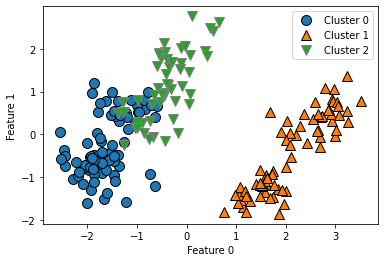

In [95]:
pca095 = PCA(n_components=0.95)
# fit PCA model to data
pca095.fit(X_train_array)
# transform data onto the first ten principal components
X_pca095 = pca095.transform(X_train_array)

for train_index, test_index in split.split(X_train_array, y_train_array):
    X_train = X_pca095[train_index]
    X_test = X_pca095[test_index]
    y_train = y_train_array[train_index]
    y_test = y_train_array[test_index]
    
# build the clustering model
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_train)
assignments=kmeans.labels_

mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], assignments)
plt.legend(["Cluster 0", "Cluster 1", "Cluster 2"], loc="best")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

**Without PCA**

Text(0, 0.5, 'Feature 1')

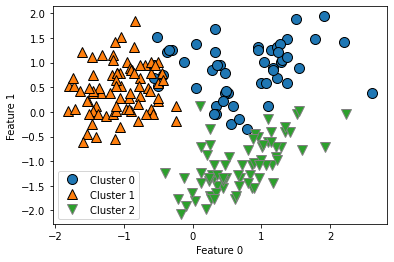

In [87]:
# generate synthetic two-dimensional data

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(X_train_array, y_train_array):
    X_train = X_train_array[train_index]
    X_test = X_train_array[test_index]
    y_train = y_train_array[train_index]
    y_test = y_train_array[test_index]

# build the clustering model
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_train)
assignments=kmeans.labels_

mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], assignments)
plt.legend(["Cluster 0", "Cluster 1", "Cluster 2"], loc="best")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

### Use an elbow visualization to determine the optimal numbers of clusters

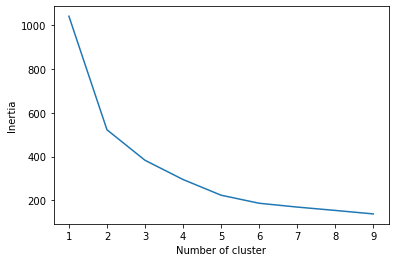

In [88]:
inertiaVals = {}

for k in range(1, 10):
    kmeansTmp = KMeans(n_clusters=k, max_iter=1000).fit(X_train)
    inertiaVals[k] = kmeansTmp.inertia_ 
plt.figure()
plt.plot(list(inertiaVals.keys()), list(inertiaVals.values()))
plt.xlabel("Number of cluster")
plt.ylabel("Inertia")
plt.show()

Result: Optimal number of clusters would be 5 (4?).

## 2. Aggolmerate/Hierarchical

**With PCA**

Text(0, 0.5, 'Feature 1')

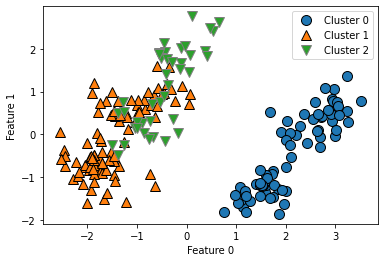

In [94]:
from sklearn.cluster import AgglomerativeClustering

# pca095 = PCA(n_components=0.95)
# # fit PCA model to data
# pca095.fit(X_train_array)
# # transform data onto the first ten principal components
# X_pca095 = pca095.transform(X_train_array)

for train_index, test_index in split.split(X_train_array, y_train_array):
    X_train = X_pca095[train_index]
    X_test = X_pca095[test_index]
    y_train = y_train_array[train_index]
    y_test = y_train_array[test_index]

agg = AgglomerativeClustering(n_clusters=3)
assignment = agg.fit_predict(X_train)

mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], assignment)
plt.legend(["Cluster 0", "Cluster 1", "Cluster 2"], loc="best")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

**Without PCA**

Text(0, 0.5, 'Feature 1')

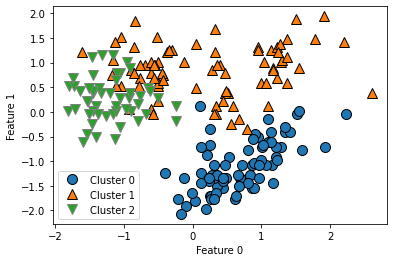

In [101]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(X_train_array, y_train_array):
    X_train = X_train_array[train_index]
    X_test = X_train_array[test_index]
    y_train = y_train_array[train_index]
    y_test = y_train_array[test_index]

agg = AgglomerativeClustering(n_clusters=3)
assignment = agg.fit_predict(X_train)

mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], assignment)
plt.legend(["Cluster 0", "Cluster 1", "Cluster 2"], loc="best")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0, 0.5, 'Cluster distance')

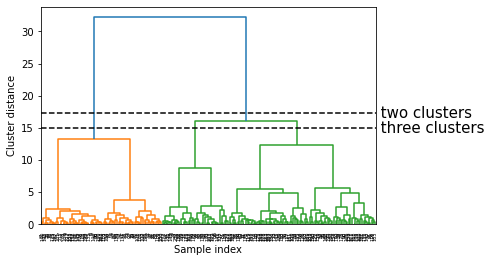

In [100]:
from scipy.cluster.hierarchy import dendrogram, ward

# Apply the ward clustering to the data array X
# The SciPy ward function returns an array that specifies the distances
# bridged when performing agglomerative clustering
linkage_array = ward(X_train)
# Now we plot the dendrogram for the linkage_array containing the distances
# between clusters
dendrogram(linkage_array)

# mark the cuts in the tree that signify two or three clusters
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [17.25, 17.25], '--', c='k')
ax.plot(bounds, [15, 15], '--', c='k')

ax.text(bounds[1], 17.25, ' two clusters', va='center', fontdict={'size': 15})
ax.text(bounds[1], 15, ' three clusters', va='center', fontdict={'size': 15})
plt.xlabel("Sample index")
plt.ylabel("Cluster distance")

## DBSCAN

**With PCA**

Text(0, 0.5, 'Feature 1')

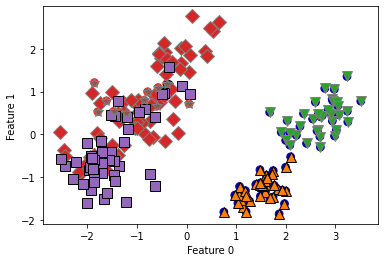

In [119]:
from sklearn.cluster import DBSCAN

for train_index, test_index in split.split(X_train_array, y_train_array):
    X_train = X_pca095[train_index]
    X_test = X_pca095[test_index]
    y_train = y_train_array[train_index]
    y_test = y_train_array[test_index]

dbscan = DBSCAN(min_samples=4,eps=0.9) # min_samples ~ min cluster size, higher eps = more pts in a cluster
clusters = dbscan.fit_predict(X_train)

# plot the cluster assignments
plt.scatter(X_train[:, 0], X_train[:, 1], c=clusters, cmap=mglearn.cm2, s=60) # changing features; same clusters plotted differently
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], clusters)
#plt.legend(["Cluster 0", "Cluster 1", "Cluster 2"], loc="best")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

**Without PCA**

Text(0, 0.5, 'Feature 1')

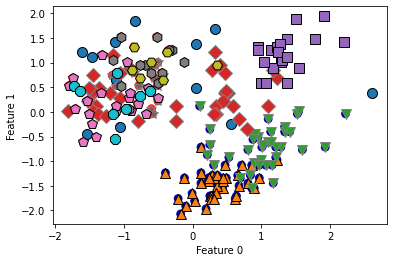

In [120]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(X_train_array, y_train_array):
    X_train = X_train_array[train_index]
    X_test = X_train_array[test_index]
    y_train = y_train_array[train_index]
    y_test = y_train_array[test_index]

dbscan = DBSCAN(min_samples=4,eps=0.9)
clusters = dbscan.fit_predict(X_train)

# plot the cluster assignments
plt.scatter(X_train[:, 0], X_train[:, 1], c=clusters, cmap=mglearn.cm2, s=60) # changing features; same clusters plotted differently
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], clusters)
#plt.legend(["Cluster 0", "Cluster 1", "Cluster 2"], loc="best")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

### Calculate ARI (with ground truth)

**With PCA**

In [130]:
print("X_train:", X_train.shape)
print("X_train_array:", X_train_array.shape)
print("y_train_enc:", y_train_enc.shape)
print("y_train_array:", y_train_array.shape)

X_train: (205, 5)
X_train_array: (257, 9)
y_train_enc: (257, 3)
y_train_array: (257, 3)


ValueError: labels_true must be 1D: shape is (205, 5)

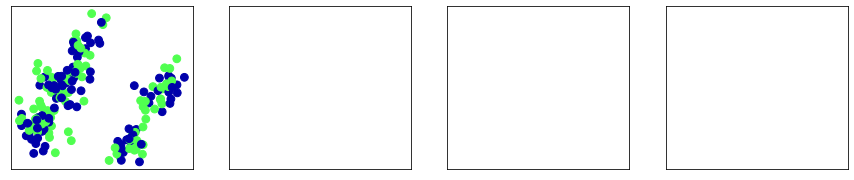

In [131]:
from sklearn.metrics.cluster import adjusted_rand_score

for train_index, test_index in split.split(X_train_array, y_train_array):
    X_train = X_pca095[train_index]
    X_test = X_pca095[test_index]
    y_train = y_train_array[train_index]
    y_test = y_train_array[test_index]

fig, axes = plt.subplots(1, 4, figsize=(15, 3),
                         subplot_kw={'xticks': (), 'yticks': ()})

# make a list of algorithms to use
algorithms = [KMeans(n_clusters=3), AgglomerativeClustering(n_clusters=3),
              DBSCAN()]

# create a random cluster assignment for reference
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X_train))

# plot random assignment
axes[0].scatter(X_train[:, 0], X_train[:, 1], c=random_clusters,
                cmap=mglearn.cm3, s=60)
axes[0].set_title("Random assignment - ARI: {:.2f}".format(
        adjusted_rand_score(X_train, random_clusters)))

for ax, algorithm in zip(axes[1:], algorithms):
    # plot the cluster assignments and cluster centers
    clusters = algorithm.fit_predict(X_train)
    ax.scatter(X_train[:, 0], X_train[:, 1], c=clusters,
               cmap=mglearn.cm3, s=60)
    ax.set_title("{} - ARI: {:.2f}".format(algorithm.__class__.__name__,
                                           adjusted_rand_score(y_train, clusters)))

**Without PCA**

In [ ]:
from sklearn.metrics.cluster import adjusted_rand_score

fig, axes = plt.subplots(1, 4, figsize=(15, 3),
                         subplot_kw={'xticks': (), 'yticks': ()})

# make a list of algorithms to use
algorithms = [KMeans(n_clusters=4), AgglomerativeClustering(n_clusters=3),
              DBSCAN()]

# create a random cluster assignment for reference
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X_train_enc))

# plot random assignment
axes[0].scatter(X_train_array[:, 0], X_train_array[:, 1], c=random_clusters,
                cmap=mglearn.cm3, s=60)
axes[0].set_title("Random assignment - ARI: {:.2f}".format(
        adjusted_rand_score(y_train, random_clusters)))

for ax, algorithm in zip(axes[1:], algorithms):
    # plot the cluster assignments and cluster centers
    clusters = algorithm.fit_predict(X_train_array)
    ax.scatter(X_train_array[:, 0], X_train_array[:, 1], c=clusters,
               cmap=mglearn.cm3, s=60)
    ax.set_title("{} - ARI: {:.2f}".format(algorithm.__class__.__name__,
                                           adjusted_rand_score(y_train_enc, clusters)))

### Calculate Silhouette coefficient (with no ground truth)

**With PCA**

In [ ]:
from sklearn.metrics.cluster import silhouette_score

# rescale the data to zero mean and unit variance
scaler = StandardScaler()
scaler.fit(X_train)
X_scaled = scaler.transform(X_train)

fig, axes = plt.subplots(1, 4, figsize=(15, 3),
                         subplot_kw={'xticks': (), 'yticks': ()})

# create a random cluster assignment for reference
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X_train))

# plot random assignment
axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=random_clusters,
                cmap=mglearn.cm3, s=60)
axes[0].set_title("Random assignment: {:.2f}".format(
    silhouette_score(X_scaled, random_clusters)))

algorithms = [KMeans(n_clusters=3), AgglomerativeClustering(n_clusters=3),
              DBSCAN()]

for ax, algorithm in zip(axes[1:], algorithms):
    clusters = algorithm.fit_predict(X_scaled)
    # plot the cluster assignments and cluster centers
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm3,
               s=60)
    ax.set_title("{} : {:.2f}".format(algorithm.__class__.__name__,
                                      silhouette_score(X_scaled, clusters)))

**Without PCA**

In [ ]:
from sklearn.metrics.cluster import silhouette_score

# rescale the data to zero mean and unit variance
scaler = StandardScaler()
scaler.fit(X_train)
X_scaled = scaler.transform(X_train)

fig, axes = plt.subplots(1, 4, figsize=(15, 3),
                         subplot_kw={'xticks': (), 'yticks': ()})

# create a random cluster assignment for reference
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X_train))

# plot random assignment
axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=random_clusters,
                cmap=mglearn.cm3, s=60)
axes[0].set_title("Random assignment: {:.2f}".format(
    silhouette_score(X_scaled, random_clusters)))

algorithms = [KMeans(n_clusters=3), AgglomerativeClustering(n_clusters=3),
              DBSCAN()]

for ax, algorithm in zip(axes[1:], algorithms):
    clusters = algorithm.fit_predict(X_scaled)
    # plot the cluster assignments and cluster centers
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm3,
               s=60)
    ax.set_title("{} : {:.2f}".format(algorithm.__class__.__name__,
                                      silhouette_score(X_scaled, clusters)))